# **Parkinson's Detection using ML**

# **Uploading Dataset**

Dataset Link:https://archive.ics.uci.edu/ml/datasets/Parkinsons

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('parkinsons.data')

# Display the first few rows
print(df.head(20))


              name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0   phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1   phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2   phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3   phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4   phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5   phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6   phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7   phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8   phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9   phon_R01_S02_4       95.056       120.103        91.226         0.00532   
10  phon_R01_S02_5       88.333       112.240        84.072         0.00505   
11  phon_R01_S02_6       91.904       115.871       

Understanding the Dataset

In [2]:
# Check dataset structure
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Display statistical summary
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Selecting Features & Target Variable

In [3]:
# Drop 'name' column as it's not useful
df = df.drop(columns=['name'])

# Define features (X) and target (y)
X = df.drop(columns=['status'])  # Features
y = df['status']                 # Target (0 or Healthy 1 for PD)

# Display shape of X and y
print(f"Features Shape: {X.shape}, Target Shape: {y.shape}")


Features Shape: (195, 22), Target Shape: (195,)


Splitting Data into Train & Test Sets

In [4]:
from sklearn.model_selection import train_test_split

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")


Training Data Shape: (156, 22), Testing Data Shape: (39, 22)


Feature Scaling (Normalization)

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)


# Train Using Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
model1.fit(X_train, y_train)

# Make predictions
y_pred = model1.predict(X_test)


Evaluation of Model

Accuracy: 0.9487
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



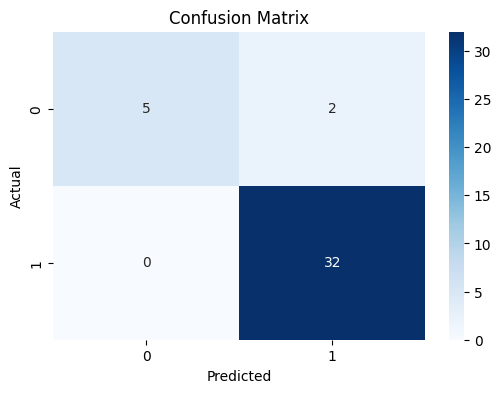

In [7]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Predict Parkinson’s for a New Patient**

In [8]:
# testing for a new patient
new_patient = [11.992, 5.302, 14.997, 0.00784, 0.00007, 0.0370, 0.00554, 0.0140,
               0.1908, 0.64, 0.355, 211.093, 0.02184, 0.01908, 0.00143, 222.105, 0.426,
               0.141, 211.94, 0.00784, 0.7, 0.00370]

# Scale the new patient data
new_patient_scaled = scaler.transform([new_patient])

# Predict Parkinson’s status
predicted_status = model1.predict(new_patient_scaled)
print("Predicted Status:", "Parkinson's" if predicted_status[0] == 1 else "Healthy")


Predicted Status: Parkinson's


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Use different Models: Logistic Regression, SVM, Neural Network

Logistic Regression Accuracy: 0.8974

 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



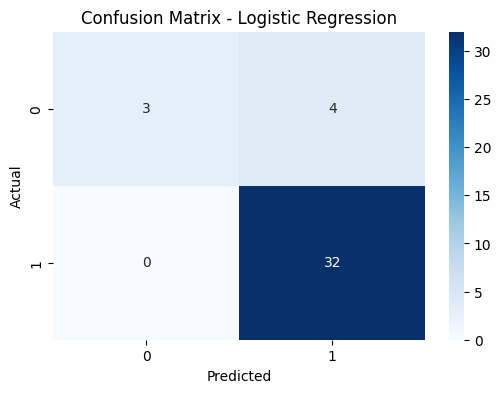

SVM Accuracy: 0.8718

 Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



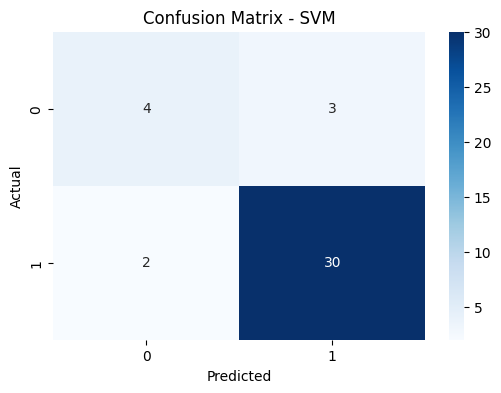

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.9487

 Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



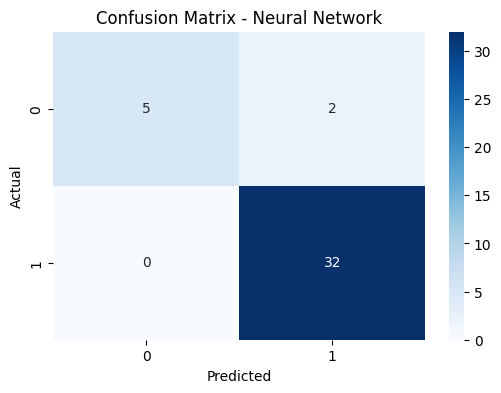

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear'),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{name} Accuracy: {acc:.4f}")

    # Display Classification Report
    print(f"\n Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Compute Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()



In [10]:
# Initialize model
NN =MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train model
NN.fit(X_train, y_train)

# Make predictions
y_pred = NN.predict(X_test)
acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f"{name} Accuracy: {acc:.4f}")

Neural Network Accuracy: 0.9487


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Engineering

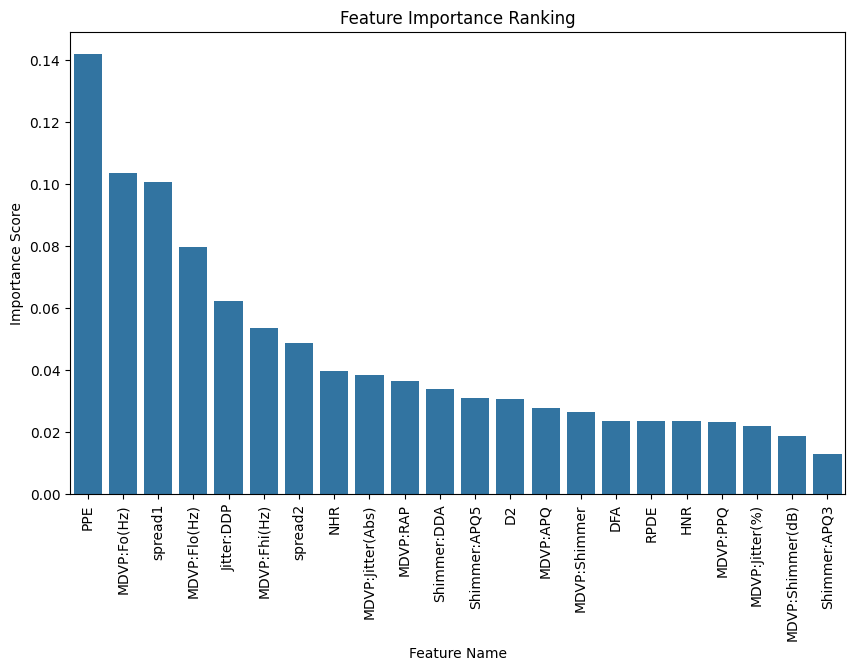

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Sort and plot feature importances
indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
plt.figure(figsize=(10,6))
sns.barplot(x=X.columns[indices], y=feature_importances[indices])
plt.xticks(rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.title("Feature Importance Ranking")
plt.show()


Select only the top 10 important features and check acuuracy for Logistic Regression

In [12]:
# Select top 10 important features
important_features = X.columns[indices[:10]]
X_train_selected = X_train[:, indices[:10]]
X_test_selected = X_test[:, indices[:10]]

# Retrain Logistic Regression with selected features
log_reg = LogisticRegression()
log_reg.fit(X_train_selected, y_train)
y_pred = log_reg.predict(X_test_selected)
print(f"Logistic Regression Accuracy (Selected Features): {accuracy_score(y_test, y_pred):.4f}")


Logistic Regression Accuracy (Selected Features): 0.9231


Check acuuracy for Random Forest Classifier for selected 10 important Features

In [13]:
# Train Random Forest on selected features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test_selected)

# Print accuracy
print(f"Random Forest Accuracy (Selected Features): {accuracy_score(y_test, y_pred_rf):.4f}")


Random Forest Accuracy (Selected Features): 0.9487


Check acuuracy for SVM for selected 10 important Features

In [14]:
# Train SVM on selected features
svm = SVC(kernel='linear')  # Linear kernel for better interpretability
svm.fit(X_train_selected, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test_selected)

# Print accuracy
print(f"SVM Accuracy (Selected Features): {accuracy_score(y_test, y_pred_svm):.4f}")


SVM Accuracy (Selected Features): 0.9231


Check acuuracy for Neural Network for selected 10 important Features

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define Neural Network architecture
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),  # 10 selected features
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (change activation for multi-class)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Neural Network
nn_model.fit(X_train_selected, y_train, epochs=20, batch_size=32, verbose=0)

# Evaluate on test data
loss, acc_nn = nn_model.evaluate(X_test_selected, y_test, verbose=0)
print(f"Neural Network Accuracy (Selected Features): {acc_nn:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Accuracy (Selected Features): 0.8462


# **Hyperparameter Tuning Using GridSearchCV**

For SVM

In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit model
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
print(f"Tuned SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Tuned SVM Accuracy: 0.8974


For Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10]   # Minimum samples to split a node
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all available processors
)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get best parameters
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Evaluate best model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest Accuracy: 0.9487


#**Save the Best Model Based on Accuracy**

In [48]:
import joblib
from tensorflow.keras.models import save_model

# Dictionary to store model names and their corresponding accuracy
model_performance = {}

# using the best accuracy for different models
model_performance["random_forest"] = 0.9487
model_performance["svm"] = 0.9231
model_performance["Neural Network"] = 0.9487
model_performance["logistic_regression"] = 0.9231

# Identify the best model
best_model_name = max(model_performance, key=model_performance.get)
best_accuracy = model_performance[best_model_name]

print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

# Save the best model
if best_model_name == "random_forest":
    joblib.dump(best_rf, "best_model.pkl")
elif best_model_name == "svm":
    joblib.dump(best_svm, "best_model.pkl")
elif best_model_name == "Neural Network":
    joblib.dump(NN,"best_model.pkl")
elif best_model_name == "logistic_regression":
    joblib.dump(log_reg, "best_model.pkl")
print(f"Best model saved as best_model.{('h5' if best_model_name == 'mlp' else 'pkl')}")


Best Model: random_forest with Accuracy: 0.9487
Best model saved as best_model.pkl


In [49]:
import joblib
from tensorflow.keras.models import load_model

# Dictionary to store model names and their corresponding accuracy
model_performance = {
    "random_forest": 0.9487,
    "svm": 0.9231,
    "Neural Network": 0.9487,
    "logistic_regression": 0.9231
}

# Identify the best model dynamically
best_model_name = max(model_performance, key=model_performance.get)
best_accuracy = model_performance[best_model_name]

print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")


Best Model: random_forest with Accuracy: 0.9487


In [50]:
# Load the best model properly
if best_model_name == "Neural Network":
    best_model = load_model("best_model.h5")  # Load Keras model
else:
    best_model = joblib.load("best_model.pkl")  # Load ML models

print(f" Loaded best model: {best_model_name}")

 Loaded best model: random_forest


# **Testing the model with another Dataset**

In [51]:
# Load test data
file_path = "/content/parkinsons_updrs.data"
test_data = pd.read_csv(file_path)

# Print column names to check for non-numeric columns
print("\n Test Data Columns:", test_data.columns)

# Ensure 'status' column is removed before prediction
if "status" in test_data.columns:
    X_test_new = test_data.drop(columns=["status"]).values  # Drop target column
else:
    X_test_new = test_data.values  # Use all data if 'status' is missing



 Test Data Columns: Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


**Choosing the best model**

In [46]:
# Normalize if required
if best_model_name == "random_forest":
    scaler = StandardScaler()
    X_test_new = scaler.fit_transform(X_test_new)

# Get last 5 samples for prediction
X_last_5 = X_test_new[-5:]


# Make predictions
predictions = best_model.predict(X_last_5)

# Convert predictions to class labels for Neural Networks
if best_model_name == "random_forest":
    predictions = predictions.astype(int)

**Making Prediction**

In [47]:
# Print Predictions
print("\n Predictions for Last 5 Data Points:")
for i, pred in enumerate(predictions):
    predicted_label = "Healthy" if pred == 0 else "Parkinson's"
    print(f"Sample {len(X_test_new)-5+i+1}: Predicted Class -> {predicted_label}")


 Predictions for Last 5 Data Points:
Sample 5871: Predicted Class -> Parkinson's
Sample 5872: Predicted Class -> Healthy
Sample 5873: Predicted Class -> Parkinson's
Sample 5874: Predicted Class -> Healthy
Sample 5875: Predicted Class -> Parkinson's
